In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from scipy.stats import shapiro
from scipy import stats
import scipy as sp

In [5]:
os.listdir('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/JAX-17M-2L/JAX-17M-2L_output_1')

['10uLRewardVolume_TrialInitial3lickbout_FirstLick_bothports.hdf5',
 '10uLRewardVolume_TrialInitial3lickbout_LastLick_bothports.hdf5',
 '15uLRewardVolume_TrialInitial3lickbout_FirstLick_bothports.hdf5',
 '15uLRewardVolume_TrialInitial3lickbout_LastLick_bothports.hdf5',
 '20uLRewardVolume_TrialInitial3lickbout_FirstLick_bothports.hdf5',
 '20uLRewardVolume_TrialInitial3lickbout_LastLick_bothports.hdf5',
 '25uLRewardVolume_TrialInitial3lickbout_FirstLick_bothports.hdf5',
 '25uLRewardVolume_TrialInitial3lickbout_LastLick_bothports.hdf5',
 '5uLRewardVolume_TrialInitial3lickbout_FirstLick_bothports.hdf5',
 '5uLRewardVolume_TrialInitial3lickbout_LastLick_bothports.hdf5',
 'AllBouts_First_ZI-PRN.hdf5',
 'AllBouts_First_ZI-PRN_baselineUncorrected_dff_ZI-PRN.h5',
 'AllBouts_First_ZI-PRN_baselineUncorrected_z_score_ZI-PRN.h5',
 'AllBouts_First_ZI-PRN_dff_ZI-PRN.h5',
 'AllBouts_First_ZI-PRN_z_score_ZI-PRN.h5',
 'AllBouts_Last_ZI-PRN.hdf5',
 'AllBouts_Last_ZI-PRN_baselineUncorrected_dff_ZI-PRN.h5',

In [9]:
sortvar = 'Lick Bout Duration (ms)'


In [10]:
dflist = []
for root, dirs, files in os.walk('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/'):
    for file in files:
        if  (file.find('Uncorrected') == -1) & (file.find('peak') != -1) & (root.find('output_1') != -1) & (file.find('First') != -1) & (file.find('s_ZI') != -1) & (file.find('z_score') != -1) & (file.find('.h5') != -1):
            print(root + file)
            mouse = root.split('/')[-2]
            day = root.split('/')[-3]
            print(mouse, root + '/' + file)
            df = pd.read_hdf(root + '/' + file)
            timestamp = [i[1] for i in df.index.str.split('_')]
            df.insert(0, 'Mouse', mouse)
            df.insert(1, 'Day', day)
            df.insert(2,'timestamps', timestamp)
            df = df.melt(id_vars=['Mouse','Day','timestamps'])
            df = df[~df['variable'].isin(['mean','err'])]
            dflist.append(df)
dfFullSet = pd.concat(dflist)

/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/JAX-15F-1L/JAX-15F-1L_output_1peak_AUC_First-BothPorts_1s_ZI-PRN_z_score_ZI-PRN.h5
JAX-15F-1L /Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/JAX-15F-1L/JAX-15F-1L_output_1/peak_AUC_First-BothPorts_1s_ZI-PRN_z_score_ZI-PRN.h5
/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/JAX-15F-1L/JAX-15F-1L_output_1peak_AUC_First-BothPorts_2s_ZI-PRN_z_score_ZI-PRN.h5
JAX-15F-1L /Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/JAX-15F-1L/JAX-15F-1L_output_1/peak_AUC_First-BothPorts_2s_ZI-PRN_z_score_ZI-PRN.h5
/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/JAX-15F-1L/JAX-15F-1L_output_1peak_AUC_First-BothPorts_4s_ZI-PRN_z_score_ZI-PRN.h5
JAX-15

In [11]:
sessionlickboutdf = pd.read_csv('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/IntermediatePythonOutput/DNDSessionlickboutdf_022923rerunnotebook.csv')


In [12]:
sessionlickboutdf = sessionlickboutdf[sessionlickboutdf['Day'] == 'Day3']

In [13]:
sessionlickboutdf['Start Guppy Timestamp (s)'] = sessionlickboutdf['Start Guppy Timestamp (s)'] - 1

In [14]:
sns.set_theme(style = 'ticks', 
              font = 'arial',
              font_scale = 0.8)

In [15]:
Day3_dir = '/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/average/'



In [39]:
search_pattern = os.path.join(Day3_dir, '**/**AllBouts_First**z_score**.csv')
files = glob.glob(search_pattern, recursive=True)

all_sc_zlist = []
all_prn_zlist = []
for file in files:
    print(file)
    if file.find('ZI-SC') > 0:
        df = pd.read_csv(file)
        df['CellType'] = 'ZI-SC'
        all_sc_zlist.append(df)
    elif file.find('ZI-PRN') > 0:
        df = pd.read_csv(file)
        df['CellType'] = 'ZI-PRN'
        all_prn_zlist.append(df)
        
len(files)

/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/average/peak_AUC_AllBouts_First_ZI-PRN_z_score_ZI-PRN.csv
/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/average/peak_AUC_AllBouts_First_ZI-SC_z_score_ZI-SC.csv


2

In [31]:
AllBout_zDF = pd.concat(all_prn_zlist + all_sc_zlist)
AllBout_zDF.rename(columns = {'Unnamed: 0': 'Mouse'}, inplace = True)
AllBout_zDF[['Mouse','Timestamp']] = AllBout_zDF['Mouse'].str.split('_', expand = True)

In [29]:
search_pattern = os.path.join(Day3_dir, '**/**First*s_**z_score**.csv')
files = glob.glob(search_pattern, recursive=True)

sc_zlist = []
prn_zlist = []
for file in files:
    print(file)
    if file.find('ZI-SC') > 0:
        df = pd.read_csv(file)
        df['CellType'] = 'ZI-SC'
        df['LickBoutDuration'] = int(file[file.find('s_')+2:file.find('s_ZI')])
        sc_zlist.append(df)
    elif file.find('ZI-PRN') > 0:
        df = pd.read_csv(file)
        df['CellType'] = 'ZI-PRN'
        df['LickBoutDuration'] = int(file[file.find('s_')+2:file.find('s_ZI')])
        prn_zlist.append(df)
        
len(files)

/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/average/peak_AUC_First-BothPorts_1s_ZI-PRN_z_score_ZI-PRN.csv
/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/average/peak_AUC_First-BothPorts_1s_ZI-SC_z_score_ZI-SC.csv
/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/average/peak_AUC_First-BothPorts_2s_ZI-PRN_z_score_ZI-PRN.csv
/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/average/peak_AUC_First-BothPorts_2s_ZI-SC_z_score_ZI-SC.csv
/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/average/peak_AUC_First-BothPorts_4s_ZI-PRN_z_score_ZI-PRN.csv
/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/average/peak_AUC_First-BothP

8

In [19]:
# Day3_dir = '/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs12_14_23/Day3/average/'
# search_pattern = os.path.join(Day3_dir, '**/**FirstLick**ms_**dff**.csv')
# files = glob.glob(search_pattern, recursive=True)

# sc_dfflist = []
# prn_dfflist = []
# for file in files:
#     print(file)
#     if file.find('ZI-SC') > 0:
#         df = pd.read_csv(file)
#         df['CellType'] = 'ZI-SC'
#         df['LickBoutDuration'] = int(file[file.find('s_')+2:file.find('ms_ZI')])
#         sc_dfflist.append(df)
#     elif file.find('ZI-PRN') > 0:
#         df = pd.read_csv(file)
#         df['CellType'] = 'ZI-PRN'
#         df['LickBoutDuration'] = int(file[file.find('s_')+2:file.find('ms_ZI')])
#         prn_dfflist.append(df)
        
# len(files)

In [34]:
Full_zDF = pd.concat(sc_zlist + prn_zlist)
#Full_dffDF = pd.concat(sc_dfflist + prn_dfflist)

In [35]:
#Full_dffDF.rename(columns = {'Unnamed: 0': 'Mouse'}, inplace = True)
Full_zDF.rename(columns = {'Unnamed: 0': 'Mouse'}, inplace = True)

In [36]:
#Full_dffDF[['Mouse','Timestamp']] = Full_dffDF['Mouse'].str.split('_', expand = True)
Full_zDF[['Mouse','Timestamp']] = Full_zDF['Mouse'].str.split('_', expand = True)

In [37]:
#Full_dffDF[Full_dffDF['Timestamp'] == 'mean']['Mouse'].value_counts()
Full_zDF[Full_zDF['Timestamp'] == 'mean']['Mouse'].value_counts()

Mouse
JAX-15F-2R     4
JAX-16F-1R     4
JAX-17M-2L     4
JAX-17M-1L     4
JAX-16M-2L     4
JAX-16M-1L     4
JAX-16F-2L     4
JAX-16F-1L     4
JAX-15F-2L     4
JAX-15F-1L     4
JAX-17M-2R     4
JAX-17M-1R     4
JAX-16M-3R     4
JAX-16M-2R     4
JAX-16M-1R     4
JAX-16F-2RB    4
JAX-16F-2R     4
JAX-17M-3L     4
Name: count, dtype: int64

In [40]:
mean_zDF = Full_zDF[Full_zDF['Timestamp'] == 'mean'].copy()
mean_zDF['CellType'] = mean_zDF['CellType'].astype('category')
mean_zDF['LickBoutDuration'] = mean_zDF['LickBoutDuration'].astype('category')

In [52]:
from scipy.stats import levene

df= AllBout_zDF[AllBout_zDF['Timestamp'] == 'mean']
var = 'peak_pos_2' #define peak_AUC variable you want to compare
lbd = 6    #define the lick bout duration you want to compare
CT = 'ZI-PRN'
CT2= 'ZI-SC'


stat, p = shapiro(mean_zDF[(mean_zDF['CellType'] =='ZI-SC') & (mean_zDF['LickBoutDuration'] == 4)][var])
alpha = 0.05

if p > alpha:
    print(var + " looks normally distributed (fail to reject H0)")
else:
    print(var + " does not look normally distributed (reject H0)")
    
lstat, p2 = levene(df[(df['CellType'] == CT)][var],
                   df[(df['CellType'] == CT2)][var])

if p2 > alpha:
    print("Variances of " + var + " are homogeneous (fail to reject H0)")
else:
    print("Variances of " + var + " are not homogeneous (reject H0)")

peak_pos_2 looks normally distributed (fail to reject H0)
Variances of peak_pos_2 are homogeneous (fail to reject H0)


Fail to reject null hypothesis: There is no significant difference between the means.
p = 0.058584320459019366


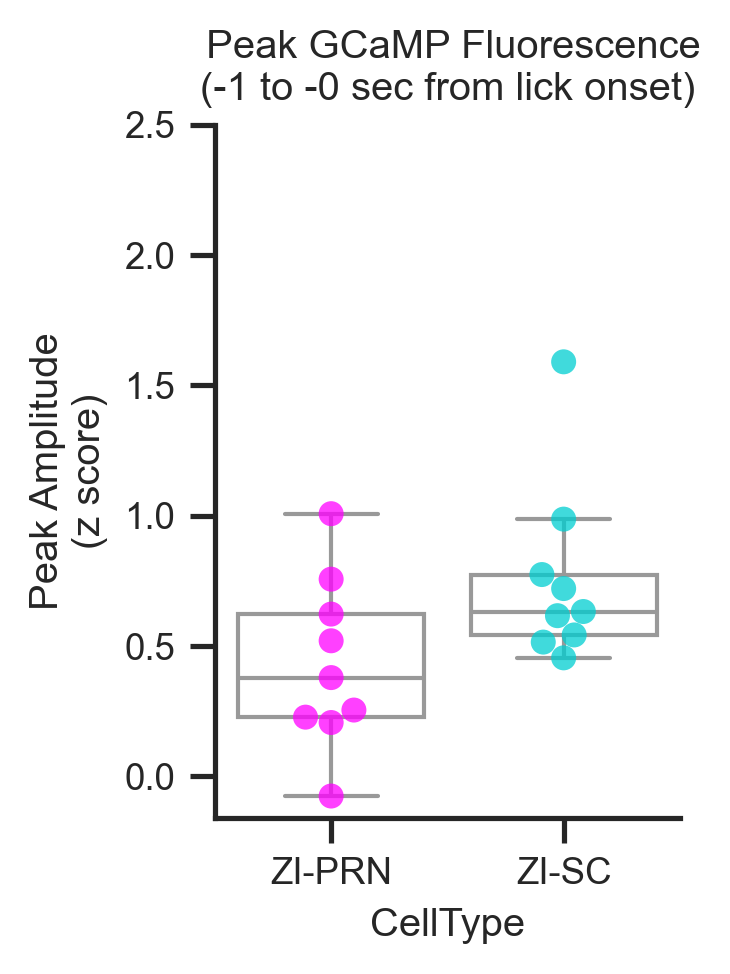

In [55]:
plt.figure(figsize=(2, 3), dpi=300)

# Bar plot
ax = sns.boxplot(
    data=AllBout_zDF[AllBout_zDF['Timestamp'] == 'mean'],
    x='CellType',
    y='peak_pos_2',
    color = 'white',
    dodge=False,
    showfliers = False,
)

# Swarm plot
swarm = sns.swarmplot(
    data=AllBout_zDF[AllBout_zDF['Timestamp'] == 'mean'],
    x='CellType',
    y='peak_pos_2',
    hue='CellType',
    hue_order = ['ZI-PRN', 'ZI-SC'],
    palette=['magenta', 'darkturquoise'],
    dodge=False,
    alpha = 0.75,
    s = 6
)

ax.set(ylabel= 'Peak Amplitude\n(z score)',
       title = ' Peak GCaMP Fluorescence\n(-1 to -0 sec from lick onset)')

ax.set_ylim(None,2.5)
# Create a legend for the swarm plot
handles, labels = swarm.get_legend_handles_labels()

plt.legend([],[],
           frameon = False)

sns.despine(top=True, right=True)




#### Run Stats

All_mean_z = AllBout_zDF[AllBout_zDF['Timestamp'] == 'mean']

t_statistic, p_value = stats.ttest_ind(All_mean_z[All_mean_z['CellType'] == 'ZI-SC']['peak_pos_2'],
                                       All_mean_z[All_mean_z['CellType'] == 'ZI-PRN']['peak_pos_2'])
# Check if the p-value is less than your chosen significance level (e.g., 0.05)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the means.")

print('p = ' + str(p_value))

#plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/zscore_Peak_LickInitiation.png', dpi = 300, bbox_inches = 'tight')
#plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/zscore_Peak_LickInitiation.svg', dpi = 300, bbox_inches = 'tight')




In [20]:
from scipy.stats import levene

df= AllBout_zDF[AllBout_zDF['Timestamp'] == 'mean']
var = 'area_2' #define peak_AUC variable you want to compare
lbd = 6    #define the lick bout duration you want to compare

for CT in df['CellType'].unique().tolist():
    stat, p = shapiro(df[(df['CellType'] ==CT)][var])
    alpha = 0.05

    if p > alpha:
        print(var + " of " + CT +  " looks normally distributed (fail to reject H0)")
    else:
        print(var + " of " + CT +  " does not look normally distributed (reject H0)")
    

lstat, p2 = levene(df[(df['CellType'] == CT)][var],
                   df[(df['CellType'] == CT2)][var])

if p2 > alpha:
    print("Variances of " + var + " are homogeneous (fail to reject H0)")
else:
    print("Variances of " + var + "are not homogeneous (reject H0)")

area_2 of ZI-PRN looks normally distributed (fail to reject H0)
area_2 of ZI-SC does not look normally distributed (reject H0)
Variances of area_2 are homogeneous (fail to reject H0)


Reject null hypothesis: There is a significant difference between the means.
p = 0.017472215978680174


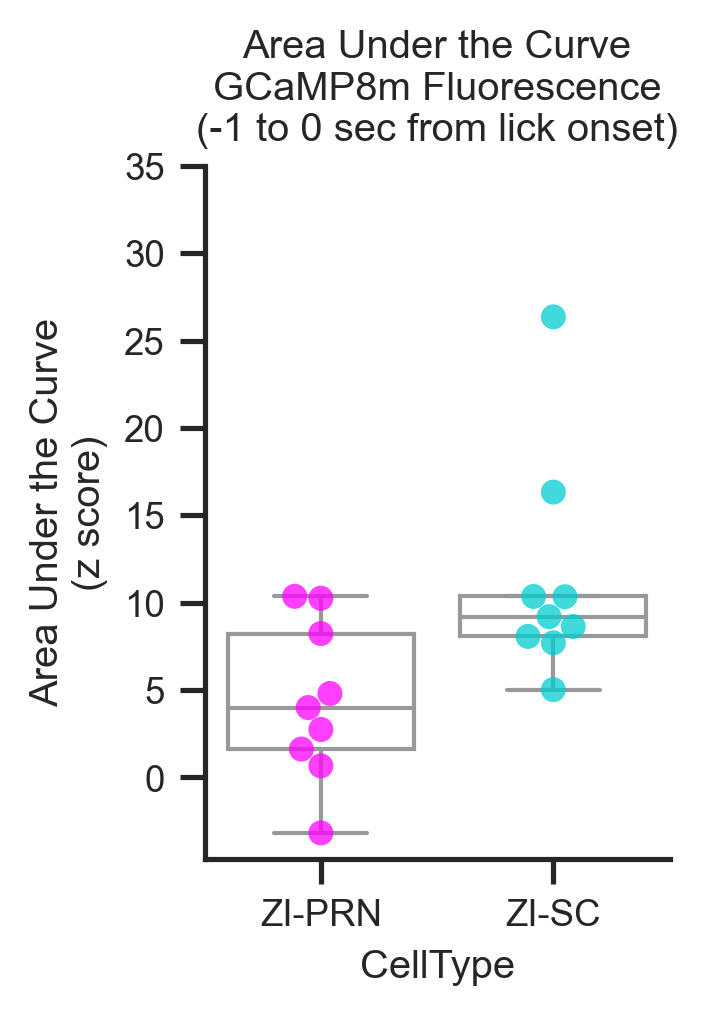

In [54]:
plt.figure(figsize=(2, 3), dpi=300)

# Bar plot
ax = sns.boxplot(
    data=AllBout_zDF[AllBout_zDF['Timestamp'] == 'mean'],
    x='CellType',
    y='area_2',
    color = 'white',
    showfliers = False
)

# Swarm plot
swarm = sns.swarmplot(
    data=AllBout_zDF[AllBout_zDF['Timestamp'] == 'mean'],
    x='CellType',
    y='area_2',
    hue='CellType',
    hue_order = ['ZI-PRN', 'ZI-SC'],
    palette=['magenta', 'darkturquoise'],
    
    alpha = 0.75,
    s = 6
)

ax.set(ylabel= 'Area Under the Curve\n(z score)',
       title = 'Area Under the Curve\nGCaMP8m Fluorescence\n(-1 to 0 sec from lick onset)', ylim = (None, 35))


#ax.set_xticklabels(['< 1', '1-2', '2-4', '>4'])

#ax.set_ylim(-2.5,2.4)
# Create a legend for the swarm plot
handles, labels = swarm.get_legend_handles_labels()

plt.legend([],[],frameon=False)

sns.despine(top=True, right=True)




#### Run Stats

All_mean_z = AllBout_zDF[AllBout_zDF['Timestamp'] == 'mean']

t_statistic, p_value = stats.ttest_ind(All_mean_z[All_mean_z['CellType'] == 'ZI-SC']['area_2'],
                                       All_mean_z[All_mean_z['CellType'] == 'ZI-PRN']['area_2'])
# Check if the p-value is less than your chosen significance level (e.g., 0.05)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the means.")

print('p = ' + str(p_value))

#plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/zscore_AUC_LickInitiation.png', dpi = 300, bbox_inches = 'tight')
#plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/zscore_AUC_LickInitiation.svg', dpi = 300, bbox_inches = 'tight')



In [46]:
from scipy.stats import levene

df= Full_zDF[Full_zDF['Timestamp'] == 'mean']
var = 'area_3' #define peak_AUC variable you want to compare

for CT in df['CellType'].unique().tolist():
    stat, p = shapiro(df[(df['CellType'] ==CT)][var])
    alpha = 0.05

    if p > alpha:
        print(var + " of " + CT +  " looks normally distributed (fail to reject H0)")
    else:
        print(var + " of " + CT +  " does not look normally distributed (reject H0)")
    

lstat, p2 = levene(df[(df['CellType'] == 'ZI-PRN')][var],
                   df[(df['CellType'] == 'ZI-SC')][var])

if p2 > alpha:
    print("Variances of " + var + " are homogeneous (fail to reject H0)")
else:
    print("Variances of " + var + "are not homogeneous (reject H0)")

area_3 of ZI-SC looks normally distributed (fail to reject H0)
area_3 of ZI-PRN does not look normally distributed (reject H0)
Variances of area_3 are homogeneous (fail to reject H0)


/var/folders/m1/69xtflwj783f2sqshj3hmjtr0000gn/T/ipykernel_57281/3271841267.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['< 1', '1-2', '2-4', '>4'])


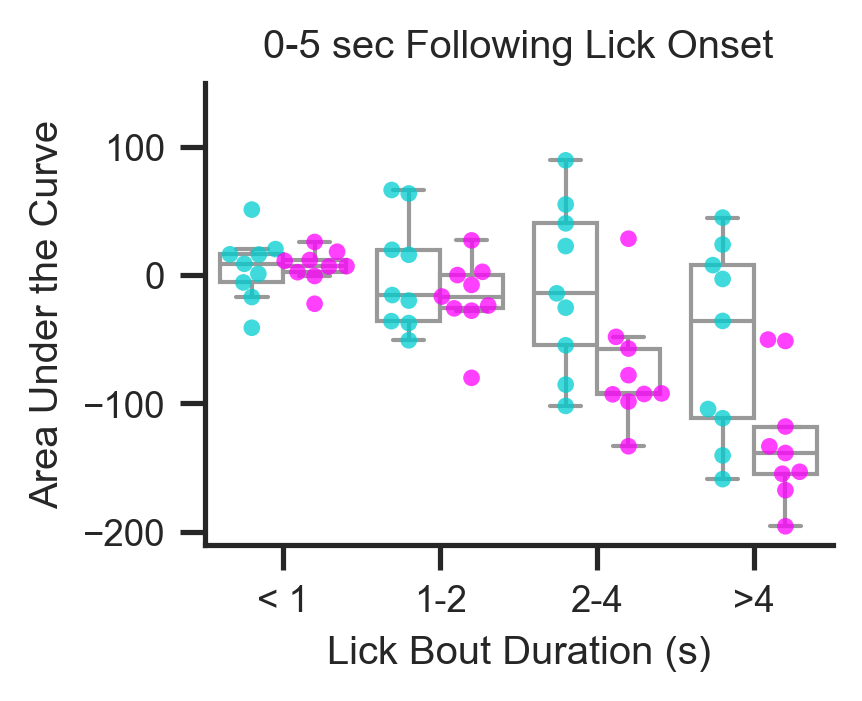

In [41]:
plt.figure(figsize=(2.7, 2), dpi=300)



ax = sns.swarmplot(
    data=Full_zDF[Full_zDF['Timestamp'] == 'mean'],
    x='LickBoutDuration',
    y='area_3',
    hue='CellType',
    hue_order = ['ZI-SC', 'ZI-PRN'],
    palette=['darkturquoise','magenta'],
    alpha = 0.75,
    dodge = True,
    s=4
    #dodge=True,
    #gap = 1.8,
)

ax = sns.boxplot( data=Full_zDF[Full_zDF['Timestamp'] == 'mean'],
    x='LickBoutDuration',
    y='area_3',
    hue='CellType',
    palette = ['white','white'],
    dodge = True,
    showfliers = False)

# Swarm plot


ax.set(xlabel= 'Lick Bout Duration (s)',
       ylabel= u'Area Under the Curve',
       title = '0-5 sec Following Lick Onset',
       ylim = (None, 150))

ax.set_xticklabels(['< 1', '1-2', '2-4', '>4'])
ax.get_legend_handles_labels()
#ax.set_ylim(-2.5,1)
# Create a legend for the swarm plot
handles, labels = ax.get_legend_handles_labels()

plt.legend([],[], frameon = False)
           

sns.despine(top=True, right=True)


#plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/Z-ScoreAUC_LickBoutDuration.png', dpi = 300, bbox_inches = 'tight')
#plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/Z-ScoreAUC_LickBoutDuration_.svg', dpi = 300, bbox_inches = 'tight')          

/var/folders/m1/69xtflwj783f2sqshj3hmjtr0000gn/T/ipykernel_57281/2685636453.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['< 1', '1-2', '2-4', '>4'])


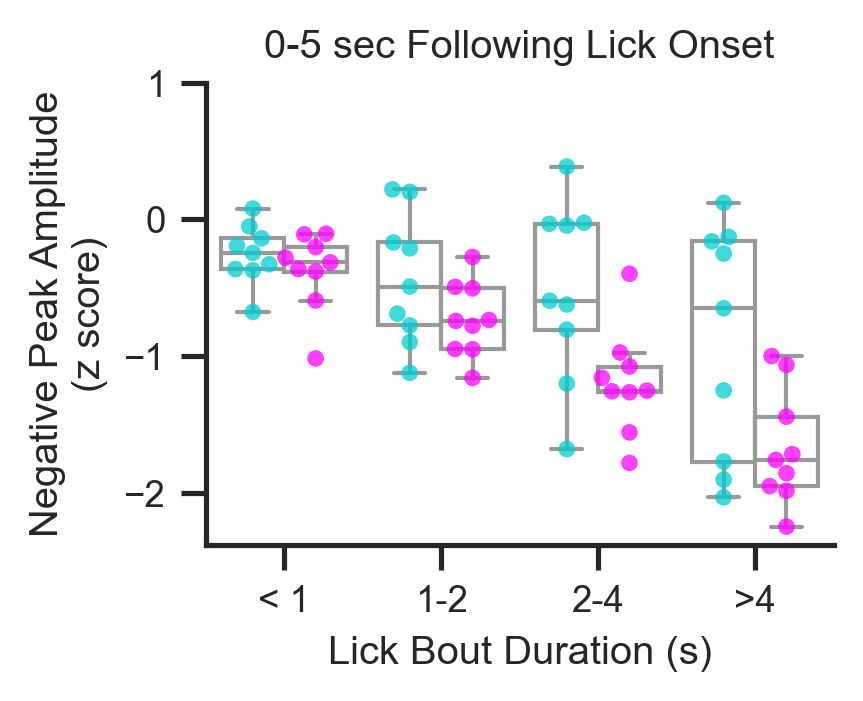

In [47]:
plt.figure(figsize=(2.7, 2), dpi=300)



ax = sns.swarmplot(
    data=Full_zDF[Full_zDF['Timestamp'] == 'mean'],
    x='LickBoutDuration',
    y='peak_neg_3',
    hue='CellType',
    hue_order = ['ZI-SC', 'ZI-PRN'],
    palette=['darkturquoise','magenta'],
    alpha = 0.75,
    dodge = True,
    s=4
    #dodge=True,
    #gap = 1.8,
)

ax = sns.boxplot( data=Full_zDF[Full_zDF['Timestamp'] == 'mean'],
    x='LickBoutDuration',
    y='peak_neg_3',
    hue='CellType',
    palette = ['white','white'],
    dodge = True,
    showfliers = False)


ax.set(xlabel= 'Lick Bout Duration (s)',
       ylabel= 'Negative Peak Amplitude\n(z score)',
       title = '0-5 sec Following Lick Onset',
       ylim = (None, 1))

ax.set_xticklabels(['< 1', '1-2', '2-4', '>4'])
ax.get_legend_handles_labels()
#ax.set_ylim(-2.5,1)
# Create a legend for the swarm plot
handles, labels = ax.get_legend_handles_labels()

plt.legend([],[], frameon = False)
           

sns.despine(top=True, right=True)


#plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/Z-Score_Peak_LickBoutDuration.png', dpi = 300, bbox_inches = 'tight')
#plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/Z-Score_Peak_LickBoutDuration.svg', dpi = 300, bbox_inches = 'tight')   


In [ ]:
plt.figure(figsize=(3, 2), dpi=300)

# Bar plot
ax = sns.pointplot(
    data=Full_dffDF[Full_dffDF['Timestamp'] == 'mean'],
    x='LickBoutDuration',
    y='area_3',
    hue='CellType',
    errorbar='se',
    palette=['teal','purple'],
    markersize = 5,
    markeredgewidth=1,
    linestyle = 'none',
    linewidth = 1,
    alpha = 0.5,
    #dodge=True,
    #gap = 1.8,
)
# Swarm plot


ax.set(xlabel= 'Lick Bout Duration (s)',
       ylabel= 'Area Under the Curve\n(ΔF/F)',
       title = 'Area Under the Curve\nGCaMP Fluorescence\n(0-5 sec from lick onset)')

ax.set_xticklabels(['< 1', '1-2', '2-4', '>4'])

#ax.set_ylim(-2.5,1)
# Create a legend for the swarm plot
handles, labels = ax.get_legend_handles_labels()

plt.legend(
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0,
           title='Projection Population',
           title_fontsize=6,
           fontsize=6)

sns.despine(top=True, right=True)

#plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/dFF_AUC_LickBoutDuration.png', dpi = 300, bbox_inches = 'tight')
#plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/dFF_AUC_LickBoutDuration.svg', dpi = 300, bbox_inches = 'tight')          


In [ ]:
plt.figure(figsize=(2, 2), dpi=300)

# Bar plot
ax = sns.pointplot(
    data=Full_zDF[Full_zDF['Timestamp'] == 'mean'],
    x='LickBoutDuration',
    y='peak_neg_3',
    hue='CellType',
    hue_order = ['ZI-SC', 'ZI-PRN'],
    errorbar='se',
    palette=['teal','purple'],
    markersize = 5,
    markeredgewidth=1,
    linestyle = 'none',
    linewidth = 1,
    alpha = 0.5,
    #dodge=True,
    #gap = 1.8,
)

# Swarm plot


ax.set(xlabel= 'Lick Bout Duration (s)',
       ylabel= u'Neative Peak Amplitude\n(z-score)',
       title = 'Negative Peak Amplitude\nGCaMP Fluorescence\n(0-5 sec from lick onset)')

ax.set_xticklabels(['< 1', '1-2', '2-4', '>4'])
ax.get_legend_handles_labels()
#ax.set_ylim(-2.5,1)
# Create a legend for the swarm plot
handles, labels = ax.get_legend_handles_labels()

plt.legend(
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0,
           title='Projection Population',
           title_fontsize=6,
           fontsize=6)
           

sns.despine(top=True, right=True)


##plt.savefig('/Users/ryankast/Documents/FengLab/Meetings/CHLA_122123/PhotometryFiguresZ-ScorePeakSignal_LickBoutDuration_purpleTeal.png', dpi = 300, bbox_inches = 'tight')
##plt.savefig('/Users/ryankast/Documents/FengLab/Meetings/CHLA_122123/PhotometryFiguresZ-ScorePeakSignal_LickBoutDuration_purpleTeal.svg', dpi = 300, bbox_inches = 'tight')
            
                        
            

In [ ]:
plt.figure(figsize=(3, 2), dpi=300)

# Bar plot
ax = sns.swarmplot(
    data=Full_zDF[Full_zDF['Timestamp'] == 'mean'],
    x='LickBoutDuration',
    y='area_1',
    hue='CellType',
    hue_order = ['ZI-SC', 'ZI-PRN'],
    #errorbar='se',
    palette= ['teal', 'purple'],
    #markersize = 5,
    #markeredgewidth=1,
    #linestyle = 'none',
    #linewidth = 1,
    alpha = 0.5,
    #dodge=True,
    #gap = 1.8,
)

# Swarm plot


ax.set(xlabel= 'Lick Bout Duration (s)',
       ylabel= u'Neative Peak Amplitude\n(z-score)',
       title = 'Negative Peak Amplitude\nGCaMP Fluorescence\n(0-5 sec from lick onset)')

ax.set_xticklabels(['< 1', '1-2', '2-4', '>4'])
ax.get_legend_handles_labels()
#ax.set_ylim(-2.5,1)
# Create a legend for the swarm plot
handles, labels = ax.get_legend_handles_labels()

plt.legend(
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0,
           title='Projection Population',
           title_fontsize=6,
           fontsize=6)
           

sns.despine(top=True, right=True)


##plt.savefig('/Users/ryankast/Documents/FengLab/Meetings/CHLA_122123/PhotometryFiguresZ-ScorePeakSignal_LickBoutDuration_purpleTeal.png', dpi = 300, bbox_inches = 'tight')
##plt.savefig('/Users/ryankast/Documents/FengLab/Meetings/CHLA_122123/PhotometryFiguresZ-ScorePeakSignal_LickBoutDuration_purpleTeal.svg', dpi = 300, bbox_inches = 'tight')
            
                        
            

In [ ]:
plt.figure(figsize=(3, 2), dpi=300)

# Bar plot
ax = sns.pointplot(
    data=Full_zDF[Full_zDF['Timestamp'] == 'mean'],
    x='LickBoutDuration',
    y='peak_pos_1',
    hue='CellType',
    hue_order = ['ZI-SC', 'ZI-PRN'],
    errorbar='se',
    palette=['teal','purple'],
    markersize = 5,
    markeredgewidth=1,
    linestyle = 'none',
    linewidth = 1,
    alpha = 0.5,
    #dodge=True,
    #gap = 1.8,
)

# Swarm plot


ax.set(xlabel= 'Lick Bout Duration (s)',
       ylabel= 'Positive Peak Amplitude\n(z-score)',
       title = 'Positive Peak Amplitude\nGCaMP Fluorescence\n(5 seconds preceeding lick onset)')

ax.set_xticklabels(['< 1', '1-2', '2-4', '>4'])
ax.get_legend_handles_labels()
ax.set_ylim(0,2)
# Create a legend for the swarm plot
handles, labels = ax.get_legend_handles_labels()

plt.legend(
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0,
           title='Projection Population',
           title_fontsize=6,
           fontsize=6)
           

sns.despine(top=True, right=True)


##plt.savefig('/Users/ryankast/Documents/FengLab/Meetings/CHLA_122123/PhotometryFiguresZ-ScorePeakSignal_LickBoutDuration_purpleTeal.png', dpi = 300, bbox_inches = 'tight')
##plt.savefig('/Users/ryankast/Documents/FengLab/Meetings/CHLA_122123/PhotometryFiguresZ-ScorePeakSignal_LickBoutDuration_purpleTeal.svg', dpi = 300, bbox_inches = 'tight')
            
                        
            

In [ ]:
plt.figure(figsize=(3, 2), dpi=300)

# Bar plot
ax = sns.pointplot(
    data=Full_zDF[Full_zDF['Timestamp'] == 'mean'],
    x='LickBoutDuration',
    y='area_1',
    hue='CellType',
    hue_order = ['ZI-SC', 'ZI-PRN'],
    errorbar='se',
    palette=['teal','purple'],
    markersize = 5,
    markeredgewidth=1,
    linestyle = 'none',
    linewidth = 1,
    alpha = 0.5,
    #dodge=True,
    #gap = 1.8,
)

# Swarm plot


ax.set(xlabel= 'Lick Bout Duration (s)',
       ylabel= 'Area Under The Curve\n(z-score)',
       title = 'Area Under the Curve\nGCaMP Fluorescence\n(5 seconds preceeding lick onset)')

ax.set_xticklabels(['< 1', '1-2', '2-4', '>4'])
ax.get_legend_handles_labels()
#ax.set_ylim(0,2)
# Create a legend for the swarm plot
handles, labels = ax.get_legend_handles_labels()

plt.legend(
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0,
           title='Projection Population',
           title_fontsize=6,
           fontsize=6)
           

sns.despine(top=True, right=True)


##plt.savefig('/Users/ryankast/Documents/FengLab/Meetings/CHLA_122123/PhotometryFiguresZ-ScorePeakSignal_LickBoutDuration_purpleTeal.png', dpi = 300, bbox_inches = 'tight')
##plt.savefig('/Users/ryankast/Documents/FengLab/Meetings/CHLA_122123/PhotometryFiguresZ-ScorePeakSignal_LickBoutDuration_purpleTeal.svg', dpi = 300, bbox_inches = 'tight')
            
                        
            

In [ ]:
FullDF[FullDF['Timestamp'] == 'mean'].groupby(['CellType', 'Mouse', 'LickBoutDuration']).mean()

In [ ]:
# Fit the 2-way ANOVA model
formula = 'area_3 ~ C(CellType) + C(LickBoutDuration) + C(CellType):C(LickBoutDuration)'
model = ols(formula, data=FullDF[FullDF['Timestamp'] == 'mean']).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
anova_table

In [ ]:
# Perform ANOVA
rm_anova_model = AnovaRM(FullDF[(FullDF['Timestamp'] == 'mean') & (FullDF['CellType'] == 'ZI-PRN')], depvar='area_3', subject='Mouse',
                         within=['LickBoutDuration'], between='CellType')

rm_anova_results = rm_anova_model.fit()

# Display the results
print(rm_anova_results)



In [ ]:
FullDF[FullDF['Timestamp'] == 'mean']

In [ ]:


# Specify the colormap (e.g., 'viridis')
cmap_name = 'Purples'
cmap = plt.get_cmap(cmap_name)

# Number of values to display
num_values = 6

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 1))

# Create a gradient array
gradient = np.linspace(0, 1, num_values)

# Create an array of values from the colormap
colormap_values = cmap(gradient)

# Display squares representing the colormap values
ax.imshow([colormap_values], aspect='auto', cmap=cmap, extent=[0, num_values, 0, 1])

# Customize the plot
ax.set_xticks(np.arange(0.5, num_values, 1))
ax.set_xticklabels(np.arange(1, num_values + 1))
ax.set_yticks([])
ax.set_title(f'Continuous Colormap: {cmap_name}')

plt.show()


In [ ]:
cd /Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs12_14_23/Day4/JAX-15F-1L/JAX-15F-1L_output_1/